In [2]:
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd

In [4]:
# Define the path to the dataset
dataset_path = '/Users/saifalikhan/downloads/train.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(dataset_path)

# Display the first few rows of the DataFrame
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [14]:
# Sales Over Time

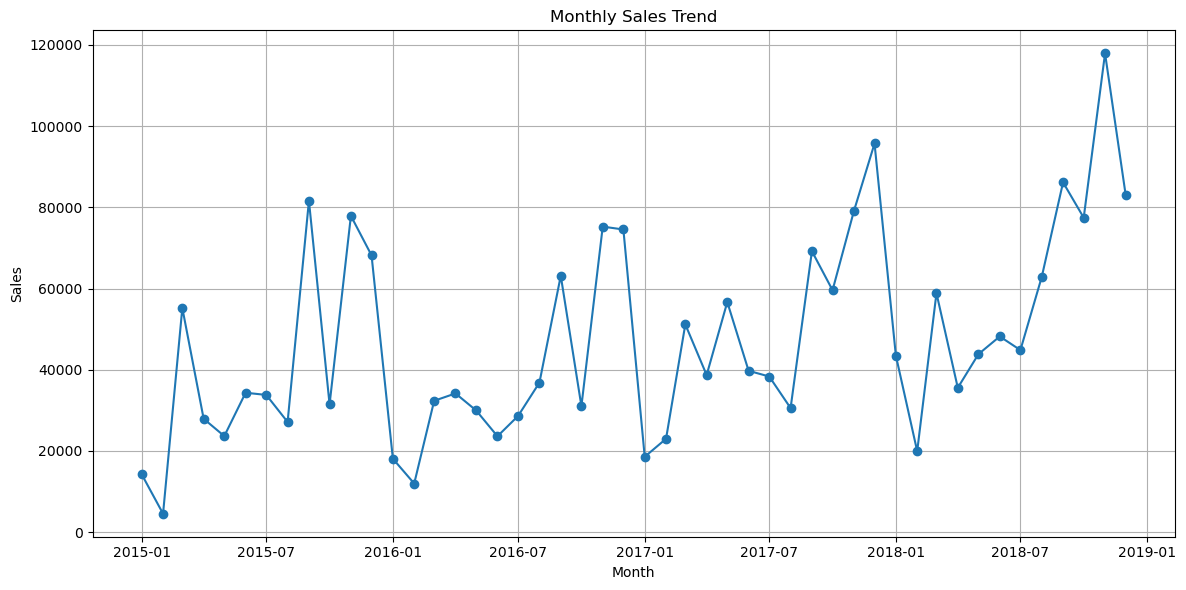

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()
monthly_sales['Order Date'] = monthly_sales['Order Date'].dt.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
# Sales over region

/var/folders/j2/kkg5_g_s1jqcd1j6wyklb6rm0000gn/T/ipykernel_33695/1417686348.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Region', data=region_sales, palette='Blues_d')


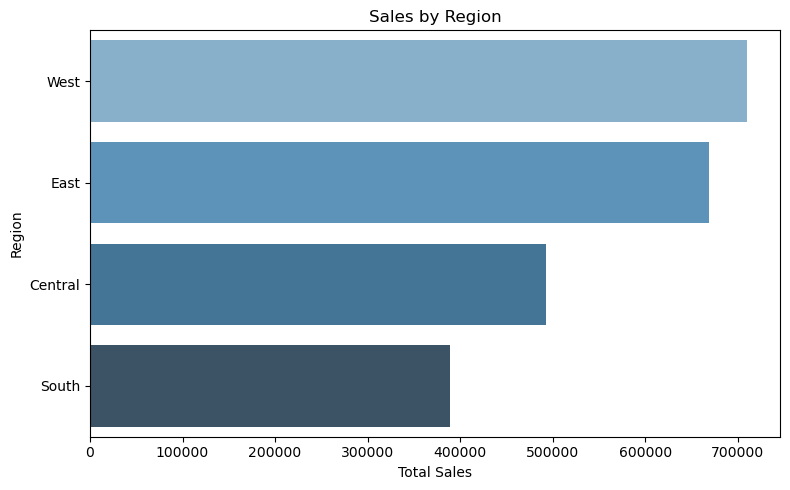

In [20]:
import seaborn as sns

region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Sales', y='Region', data=region_sales, palette='Blues_d')
plt.title('Sales by Region')
plt.xlabel('Total Sales')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


In [22]:
# Top Performing Sub-Categories or Products

/var/folders/j2/kkg5_g_s1jqcd1j6wyklb6rm0000gn/T/ipykernel_33695/2525744231.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Product Name', data=top_products, palette='Greens_r')


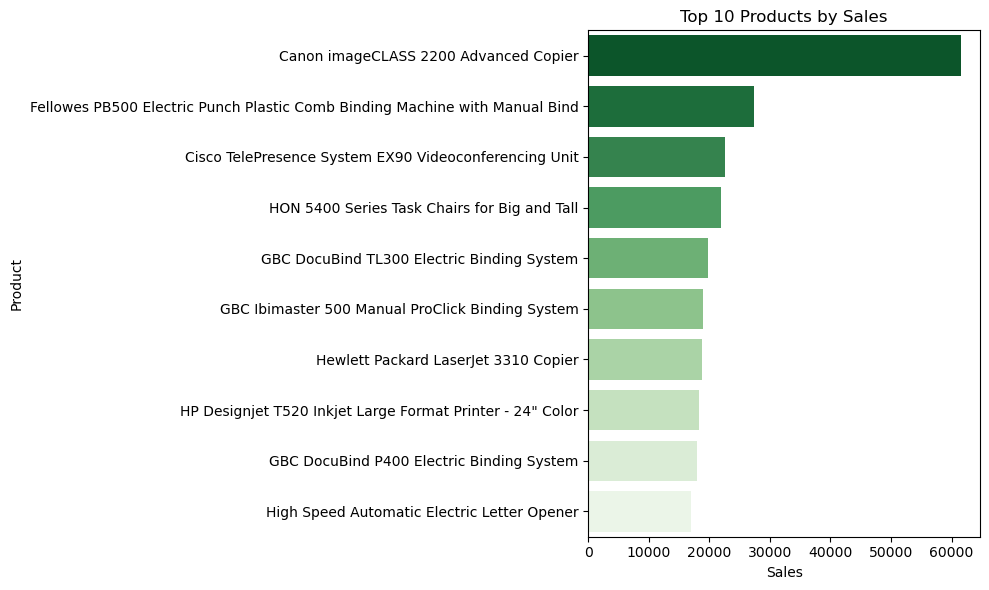

In [24]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Sales', y='Product Name', data=top_products, palette='Greens_r')
plt.title('Top 10 Products by Sales')
plt.xlabel('Sales')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


In [26]:
# Shipping Performance (Delivery Time)

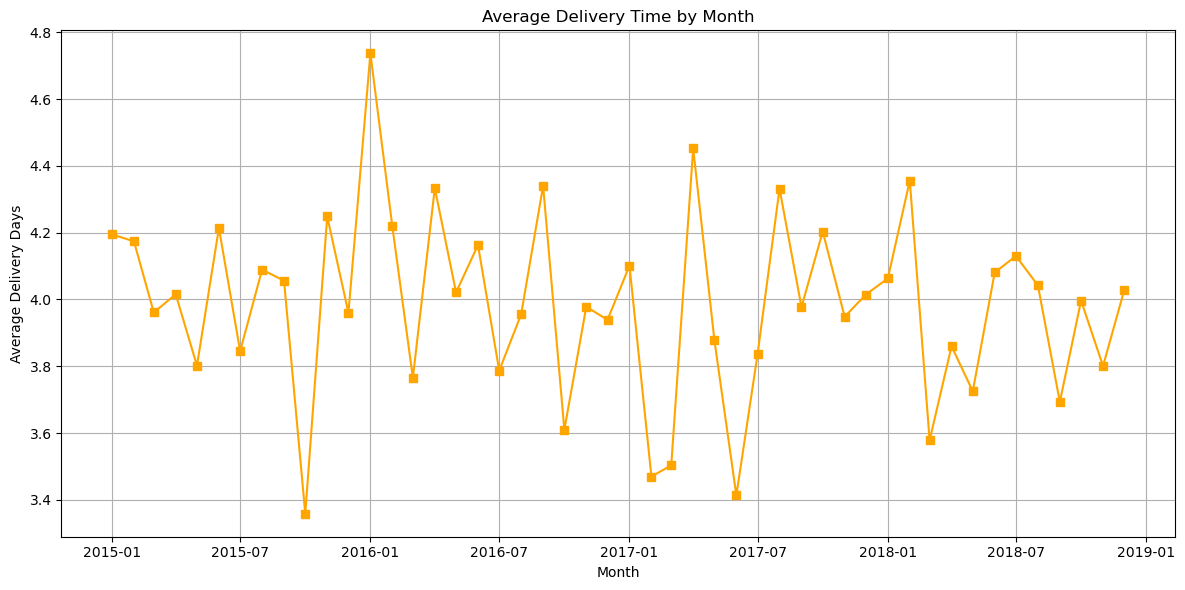

In [28]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days

delivery_performance = df.groupby(df['Order Date'].dt.to_period('M'))['Delivery Time'].mean().reset_index()
delivery_performance['Order Date'] = delivery_performance['Order Date'].dt.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(delivery_performance['Order Date'], delivery_performance['Delivery Time'], marker='s', color='orange')
plt.title('Average Delivery Time by Month')
plt.xlabel('Month')
plt.ylabel('Average Delivery Days')
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
# Sales vs. Shipping Mode

/var/folders/j2/kkg5_g_s1jqcd1j6wyklb6rm0000gn/T/ipykernel_33695/2804852919.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ship Mode', y='Sales', data=shipmode_sales, palette='Set2')


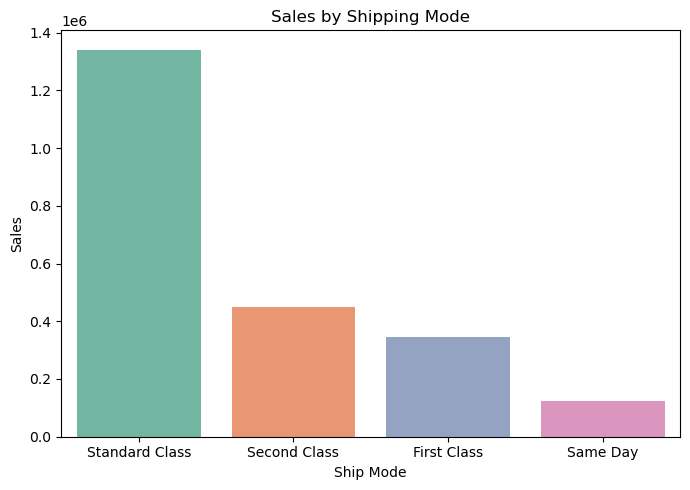

In [34]:
shipmode_sales = df.groupby('Ship Mode')['Sales'].sum().reset_index().sort_values('Sales', ascending=False)

plt.figure(figsize=(7,5))
sns.barplot(x='Ship Mode', y='Sales', data=shipmode_sales, palette='Set2')
plt.title('Sales by Shipping Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


In [36]:
 #Repeat vs. One-time Customers

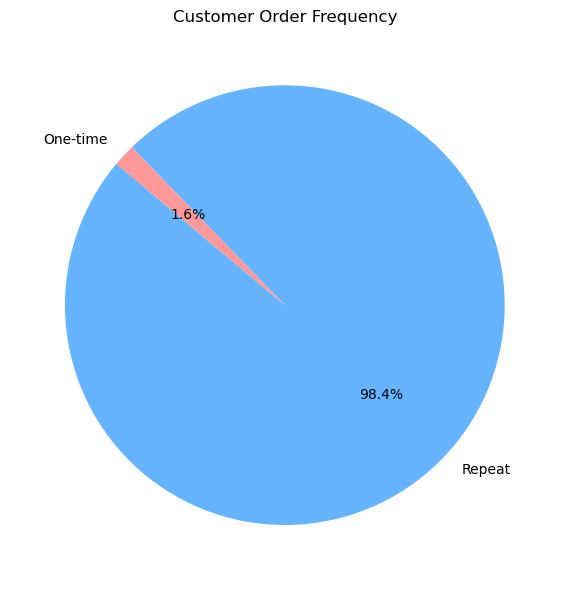

In [38]:
customer_orders = df.groupby('Customer ID')['Order ID'].nunique().reset_index(name='Order Count')
repeat_status = customer_orders['Order Count'].apply(lambda x: 'Repeat' if x > 1 else 'One-time')

repeat_summary = repeat_status.value_counts().reset_index()
repeat_summary.columns = ['Customer Type', 'Count']

plt.figure(figsize=(6,6))
plt.pie(repeat_summary['Count'], labels=repeat_summary['Customer Type'], autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Customer Order Frequency')
plt.tight_layout()
plt.show()


In [40]:
# Summary KPIs

In [42]:
total_sales = df['Sales'].sum()
total_orders = df['Order ID'].nunique()
avg_delivery = df['Delivery Time'].mean()

print("📊 Summary KPIs:")
print(f"• Total Sales: ${total_sales:,.2f}")
print(f"• Total Orders: {total_orders}")
print(f"• Avg Delivery Time: {avg_delivery:.2f} days")


📊 Summary KPIs:
• Total Sales: $2,261,536.78
• Total Orders: 4922
• Avg Delivery Time: 3.96 days
